In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


#Importing Dataset

In [ ]:
df=pd.read_csv("loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

- Dataset has 614 rows and 13 columns

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#Checking Null Values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
list1=["LoanAmount","Loan_Amount_Term"]
for i in list1:
  df[i]=df[i].fillna(df[i].mean())

list2=["Gender","Married","Dependents","Self_Employed","Credit_History"]
for i in list2:
  df[i]=df[i].fillna(df[i].mode()[0])

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

In [ ]:
df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y


Male      502
Female    112
Name: Gender, dtype: int64


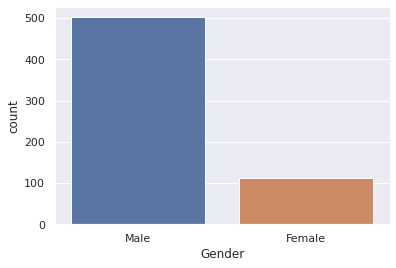

In [ ]:
sns.countplot(df["Gender"])
print(df['Gender'].value_counts())

- There are 502 male applicants and 112 female applicants for loan.

Yes    401
No     213
Name: Married, dtype: int64


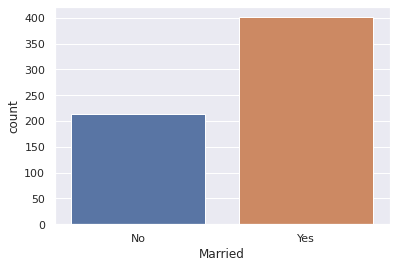

In [ ]:
sns.countplot(df["Married"])
print(df['Married'].value_counts())

- There are 401 married and 213 unmarried applicants for loan

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


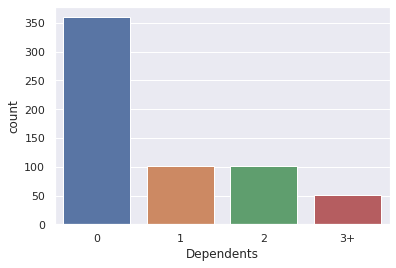

In [ ]:
sns.countplot(df["Dependents"])
print(df['Dependents'].value_counts())

- There are 360 applicants with 0 dependents
- 102 applicants with 1 dependent
- 101 applicants with 2 dependents
- 51 applicants with 3+ dependents

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


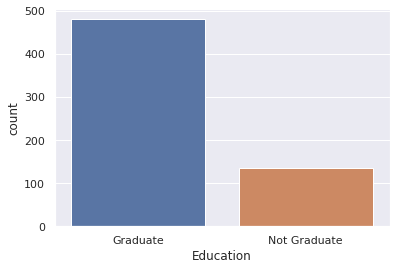

In [ ]:
sns.countplot(df["Education"])
print(df['Education'].value_counts())

- There are 480 graduates and 134 non graduates applicants for loan

No     532
Yes     82
Name: Self_Employed, dtype: int64


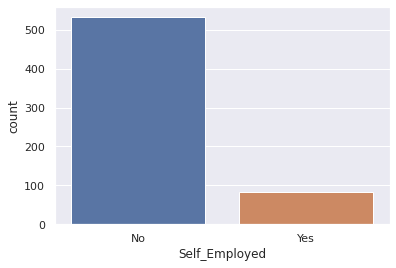

In [ ]:
sns.countplot(df["Self_Employed"])
print(df['Self_Employed'].value_counts())

- There are 82 self employed and 532 not self employed applicants

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


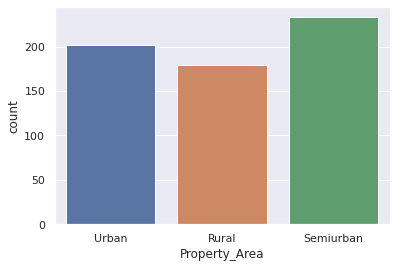

In [ ]:
sns.countplot(df["Property_Area"])
print(df['Property_Area'].value_counts())

Property area for which Applicants are applying for loan.
- Semiurban   - 233 applicants
- Urban       - 202 applicants
- Rural       - 179 applicants

Y    422
N    192
Name: Loan_Status, dtype: int64


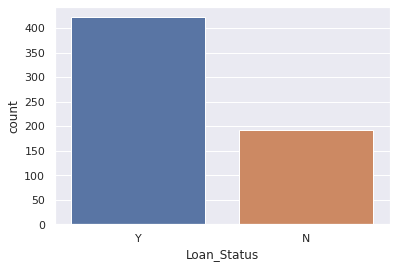

In [ ]:
sns.countplot(df["Loan_Status"])
print(df['Loan_Status'].value_counts())

- 422 applicants loan was approved whereas 192 applicants loan request was rejected.

Text(0, 0.5, 'Loan_Status')

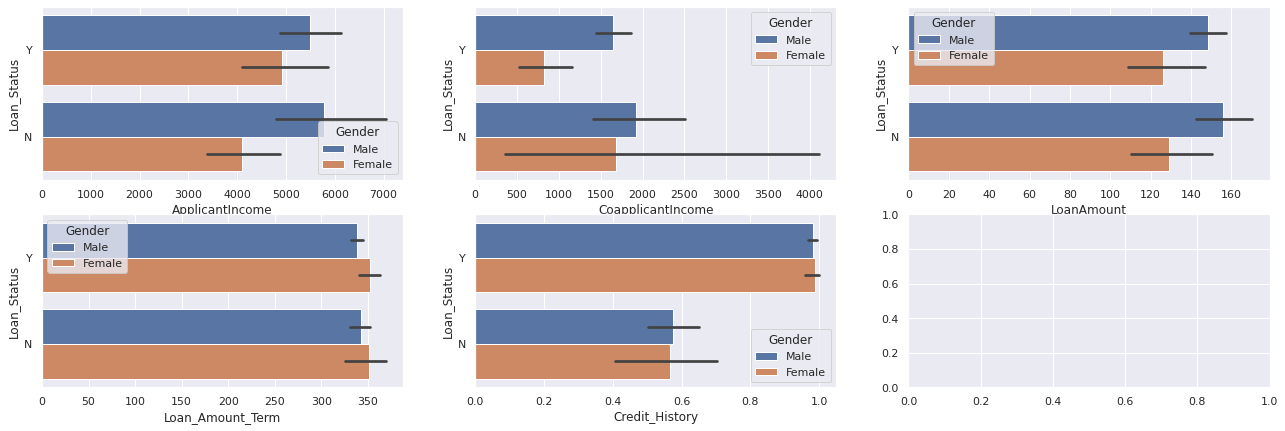

In [ ]:
sns.set()
fig,axes=plt.subplots(2,3,figsize=(22,7))
sns.barplot(x='ApplicantIncome',y="Loan_Status",hue="Gender",data=df,ax=axes[0,0])
axes[0,0].set_ylabel("Loan_Status")
sns.barplot(x='CoapplicantIncome',y="Loan_Status",hue="Gender",data=df,ax=axes[0,1])
axes[0,1].set_ylabel("Loan_Status")
sns.barplot(x='LoanAmount',y="Loan_Status",hue="Gender",data=df,ax=axes[0,2])
axes[0,2].set_ylabel("Loan_Status")
sns.barplot(x='Loan_Amount_Term',y="Loan_Status",hue="Gender",data=df,ax=axes[1,0])
axes[1,0].set_ylabel("Loan_Status")
sns.barplot(x='Credit_History',y="Loan_Status",hue="Gender",data=df,ax=axes[1,1])
axes[1,1].set_ylabel("Loan_Status")


Applicant Income
- Loan Accepted and Loan Rejected applicants both had male applicants with higher percentage of income than female.

Coapplicant Income
- Loan Accepted and Loan Rejected applicants both had male coapplicant with higher percentage of income than female coapplicant.

Loan Amount
- Loan Accepted and Loan Rejected applicants both had male applicants with request for larger loanamount than female applicants.

Loan Amount Term
- Loan Accepted and Loan Rejected applicants both had female applicants with longer loan term than male applicants.

Credit History
- Among Loan Accepted applicants female applicants had better credit history than male applicants 
- Among Loan Rejected applicants Male applicants had better credit history than Female applicants .

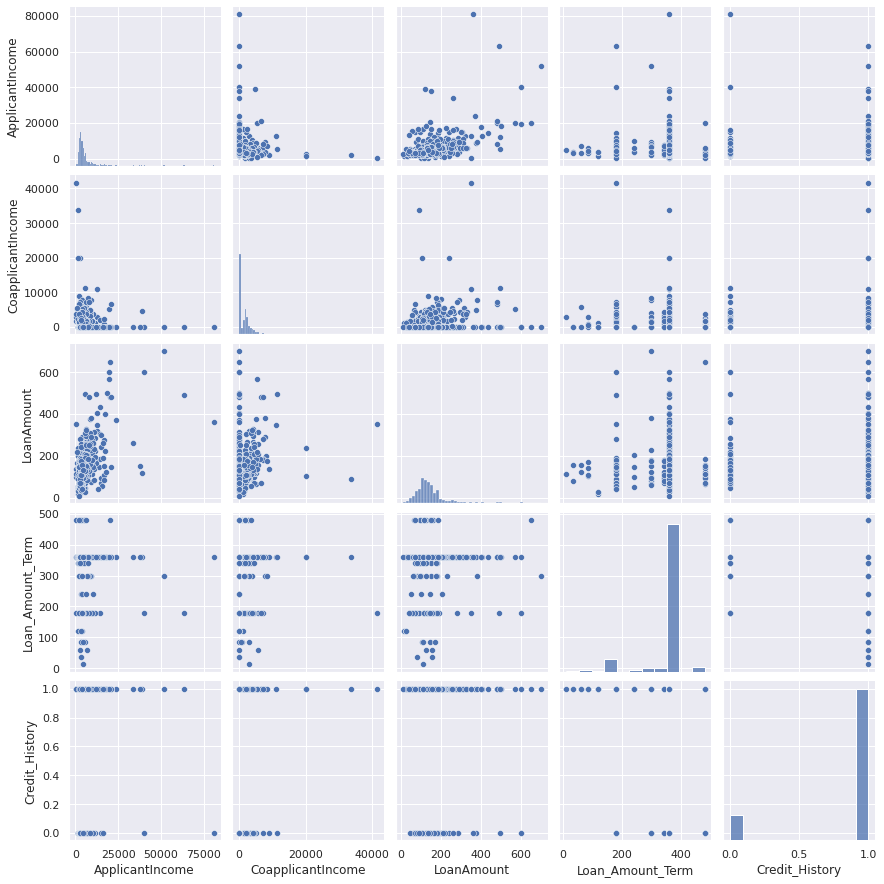

In [ ]:
sns.pairplot(df)

#Encoding categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
list3=["Loan_ID","Gender","Married","Dependents","Education","Self_Employed","Property_Area","Loan_Status"]

for i in list3:
  df[i]=enc.fit_transform(df[i].values.reshape(-1,1))
  
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


# Checking Correlation

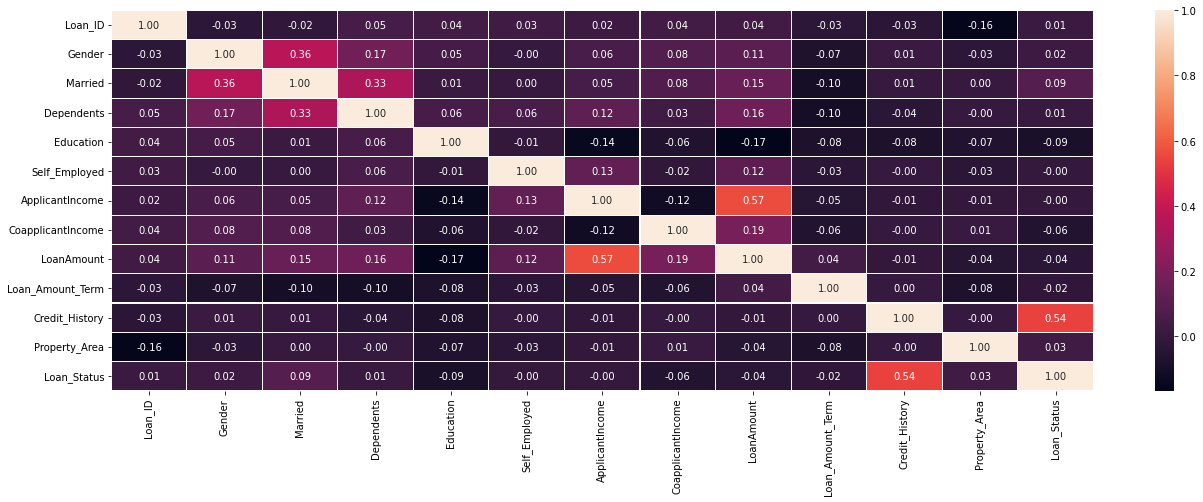

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

- Loan_ID has 1 percent correlation with target column which is considered as a very weak +ve bond.
- Gender has 2 percent correlation with target column which is considered as a very weak +ve bond.
- Married has 9 percent correlation with target column which is considered as a very weak +ve bond.
- Dependents has 1 percent correlation with target column which is considered as a very weak +ve bond.
- Eductaion has -9 percent correlation with target column which is considered as a strong -ve bond.
- CoapplicantIncome has -6 percent correlation with target column which is considered as a strong -ve bond.
- LoanAmount has -4 percent correlation with target column which is considered as a weak -ve bond.
- Loan_Amount_Term has -2 percent correlation with target column which is considered as a weak -ve bond.
- Credit_History has 54 percent correlation with target column which is considered as a strong +ve bond.
- Property_Area has 3 percent correlation with target column which is considered as a weak +ve bond.

# Describing Data

In [ ]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in PassengerId, Fare and Age compared to other features.

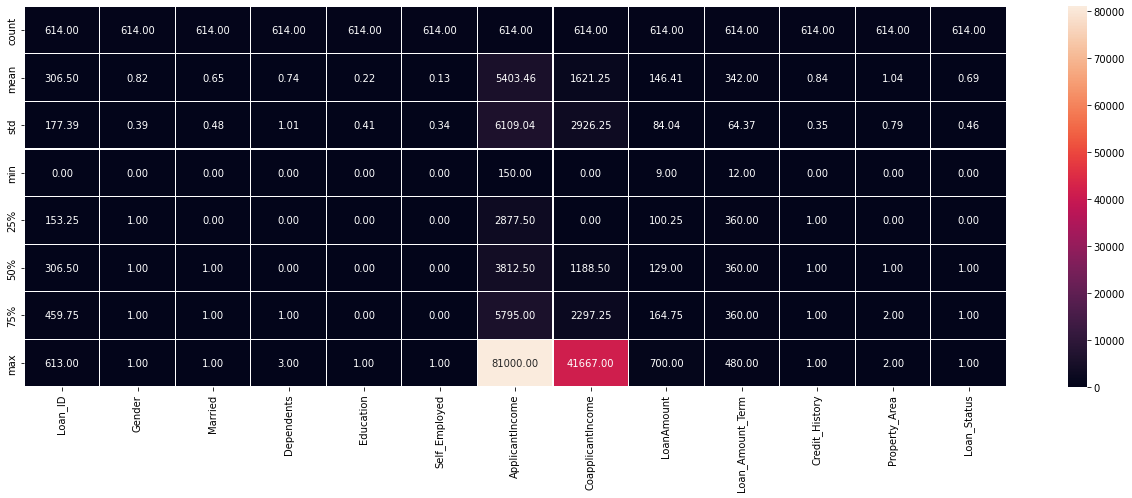

In [ ]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="white",fmt="0.2f")

Loan_ID
- mean -	306.500000
- std -	177.390811
- min -	0.000000
- max -	613.000000

Gender
- mean -	0.817590
- std -	0.386497
- min -	0.000000
- max -	1.000000

Married	
- mean - 0.653094	
- std -	0.476373
- min -	0.000000	
- max -	1.000000

Dependents
- mean -	0.744300
- std -	1.009623
- min -	0.000000	
- max -3.000000	

Education
- mean -	0.218241
- std -	0.413389
- min -	0.000000
- max -	1.000000

Self_Employed
- mean -	0.133550	
- std -	0.340446	
- min -		0.000000
- max -		1.000000	

ApplicantIncome
- mean -	5403.459283	
- std -	6109.041673	
- min -	150.000000	
- max -	81000.000000	

CoapplicantIncome
- mean -	1621.245798	
- std -	2926.248369	
- min -	0.000000
- max -	41667.000000

LoanAmount 	
- mean -	146.412162
- std -	84.037468	
- min -	9.000000
- max -	700.000000

Loan_Amount_Term		
- mean -	342.000000	
- std -	64.372489	
- min -		12.000000	
- max -	480.000000	

Credit_History 
- mean - 0.842199	
- std -	0.349681	
- min -	0.000000	
- max -	1.000000	

Property_Area 
- mean - 1.037459
- std -	0.787482
- min -	0.000000
- max -	2.000000

Loan_Status
- mean - 0.687296
- std -	0.463973
- min -	0.000000
- max -	1.000000

# Separating input feature and target

In [ ]:
x=df.drop(["Loan_Status"],axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [ ]:
y=df["Loan_Status"]
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

#Checking Skewness

In [ ]:
x.skew().sort_values()

Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
Property_Area       -0.066196
Loan_ID              0.000000
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
LoanAmount           2.726601
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

Keeping +/- 0.5 as the range of the skewness, the following features are skewed
- Loan_Amount_Term   
- Credit_History      
- Gender              
- Married            
- Dependents           
- Education            
- Self_Employed        
- LoanAmount           
- ApplicantIncome      
- CoapplicantIncome          

From above list only ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term are non categorical, hence we can remove skewness.

Text(0, 0.5, '')

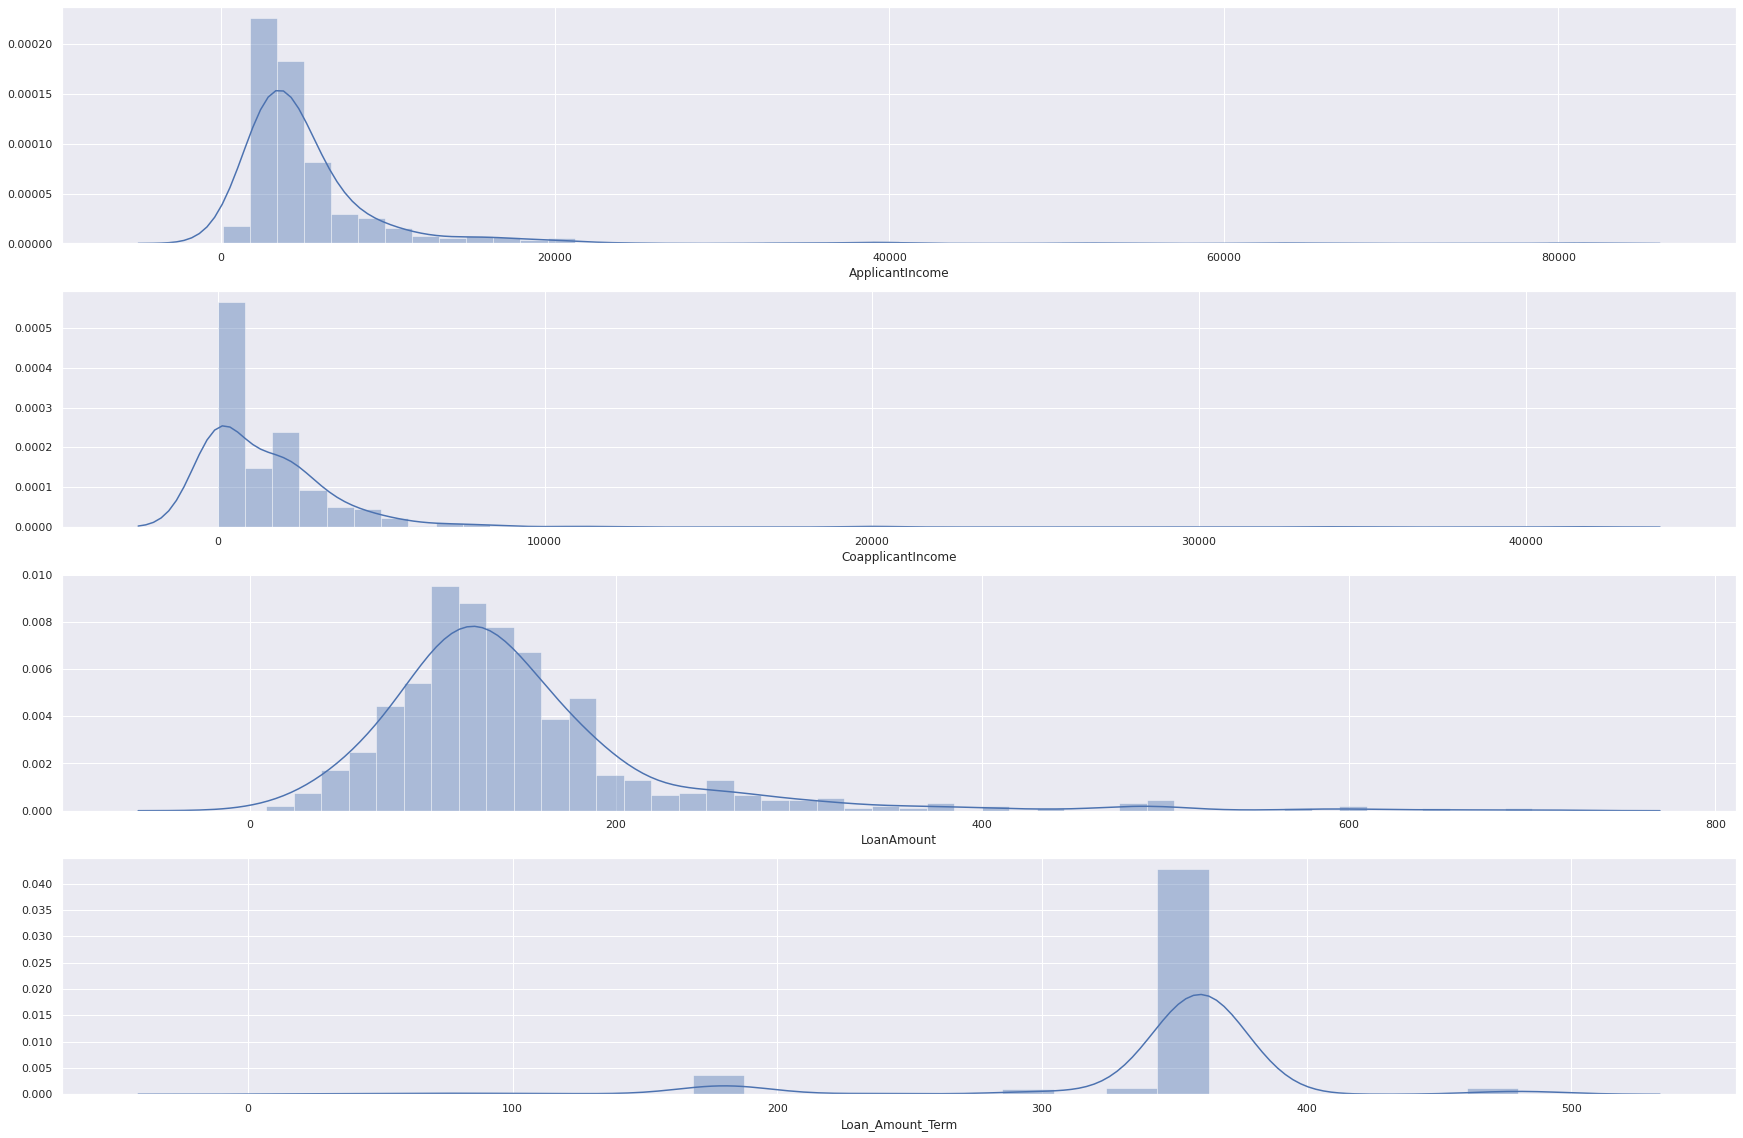

In [ ]:
sns.set()
fig,axes= plt.subplots(4,figsize=(30,20))
sns.distplot(x["ApplicantIncome"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["CoapplicantIncome"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["LoanAmount"],ax=axes[2])
axes[2].set_ylabel("")
sns.distplot(x["Loan_Amount_Term"],ax=axes[3])
axes[3].set_ylabel("")

- All graphs excpet loan amount term are of continuous datatype.

In [ ]:
from sklearn.preprocessing import power_transform
list4=["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
for i in list4:
  x[i]=power_transform(x[i].values.reshape(-1,1))

Text(0, 0.5, '')

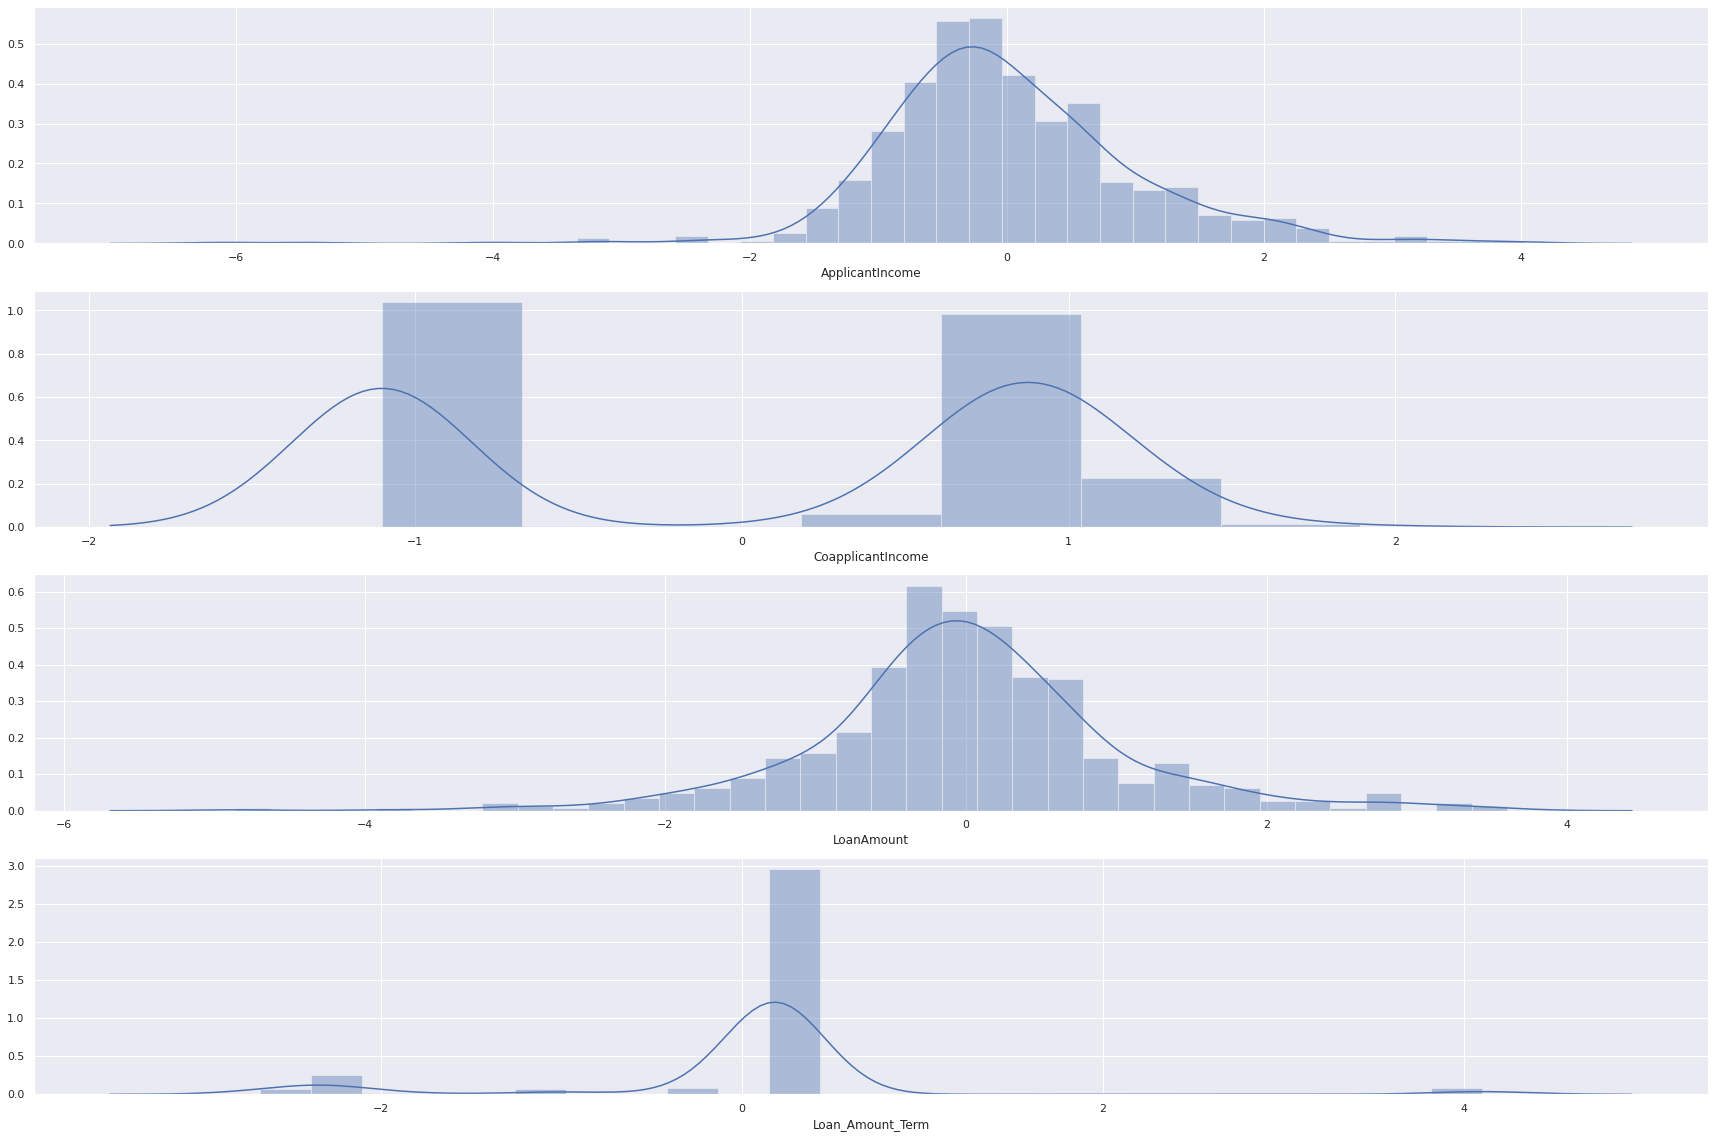

In [ ]:
sns.set()
fig,axes= plt.subplots(4,figsize=(30,20))
sns.distplot(x["ApplicantIncome"],ax=axes[0])
axes[0].set_ylabel("")
sns.distplot(x["CoapplicantIncome"],ax=axes[1])
axes[1].set_ylabel("")
sns.distplot(x["LoanAmount"],ax=axes[2])
axes[2].set_ylabel("")
sns.distplot(x["Loan_Amount_Term"],ax=axes[3])
axes[3].set_ylabel("")

- Loan_Amount_Term graphs contain discrete datatype.

In [ ]:
x.skew().sort_values()

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
CoapplicantIncome   -0.145646
ApplicantIncome     -0.092946
Property_Area       -0.066196
Loan_ID              0.000000
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
dtype: float64

#Detecting Outliers

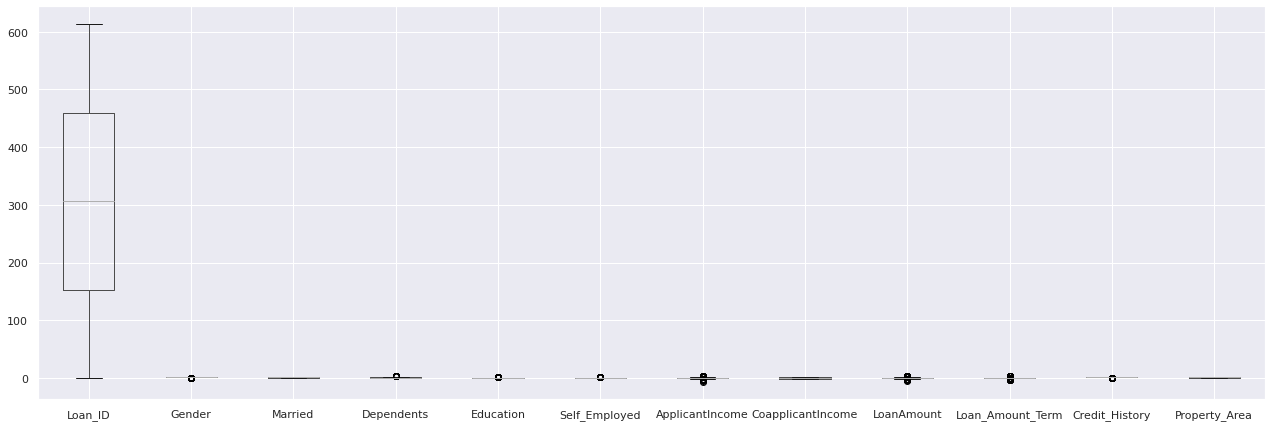

In [ ]:
x.iloc[:,:13].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

Only following features contains outliers
- Gender
- Dependents
- Education
- Self_employed
- ApplicantIncome     
- CoapplicantIncome   
- LoanAmount       
- Loan_Amount_Term    
- Credit_History 

Only ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History are non categorical features from which outliers can be removed.  

In [ ]:
df=x.copy()

In [ ]:
new_df_cap=df.copy()

In [ ]:
def remove_outliers(n):
  Q3=np.percentile(df[n],75,interpolation="midpoint")
  Q1=np.percentile(df[n],25,interpolation="midpoint")
  iqr=Q3-Q1
  percent75=df[n].quantile(0.75)
  percent25=df[n].quantile(0.25)
  upper_limit=percent75+1.5*iqr
  lower_limit=percent25-1.5*iqr
  df[df[n]>upper_limit]
  df[df[n]<lower_limit]

  new_df=df[df[n]<upper_limit]

  new_df_cap[n]=np.where(
      new_df_cap[n]>upper_limit,
      upper_limit,
      np.where(
          new_df_cap[n]<lower_limit,
          lower_limit,
          new_df_cap[n]
      )
  )
  sns.boxplot(new_df_cap[n])

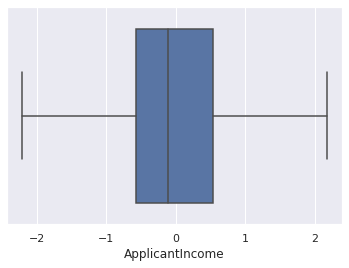

In [ ]:
remove_outliers("ApplicantIncome")

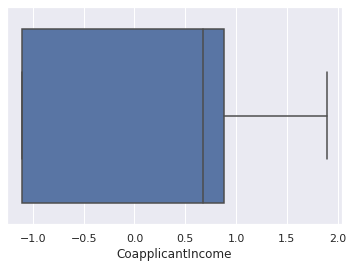

In [ ]:
remove_outliers("CoapplicantIncome")

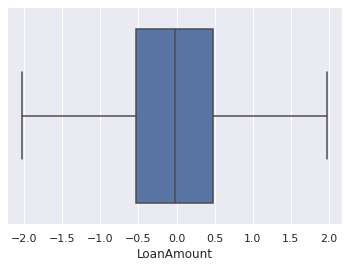

In [ ]:
remove_outliers("LoanAmount")

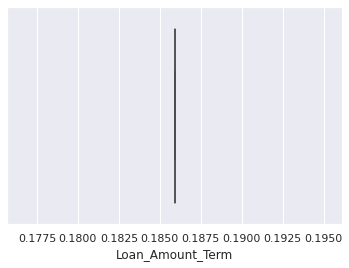

In [ ]:
remove_outliers("Loan_Amount_Term")

In [ ]:
df["Loan_Amount_Term"].unique()

array([ 0.18590509, -2.559436  , -1.82040163, -0.22087504, -2.30856969,
       -2.65222374, -1.01546121,  4.09723299, -2.66275503, -2.62902125,
       -2.66563354])

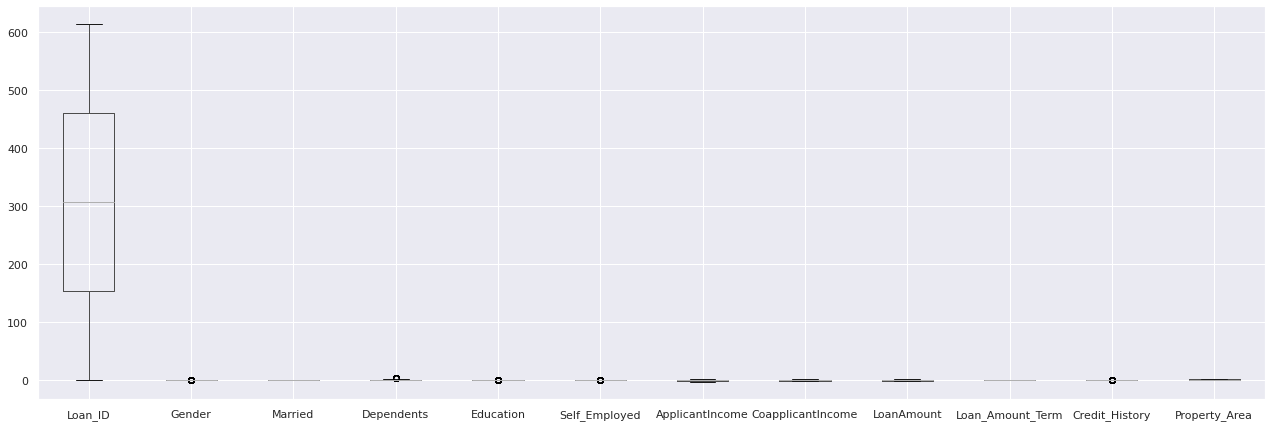

In [ ]:
new_df_cap.iloc[:,:13].boxplot(figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
plt.show()

# Detecting Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df_cap)

,variables,VIF
0,Loan_ID,1.032594
1,Gender,1.201922
2,Married,1.385289
3,Dependents,1.177677
4,Education,1.068700
5,Self_Employed,1.048822
6,ApplicantIncome,2.000353
7,CoapplicantIncome,1.631682
8,LoanAmount,1.699452
9,Loan_Amount_Term,18.993666


Loan_Amount_term have VIF>5, indicating presence of multicollinearity in datastet. 

In [ ]:
X = new_df_cap.drop(["Loan_Amount_Term"],axis=1)
calc_vif(X)

,variables,VIF
0,Loan_ID,3.200282
1,Gender,5.370416
2,Married,3.890169
3,Dependents,1.818002
4,Education,1.344547
5,Self_Employed,1.200334
6,ApplicantIncome,1.985898
7,CoapplicantIncome,1.598794
8,LoanAmount,1.699331
9,Credit_History,4.645330


# Oversampling

In [ ]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_new, y_new = sm.fit_resample(X, y)

In [ ]:
y_new.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [ ]:
y=y_new

# Traning and Testing

# Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


mns=MinMaxScaler()
s=mns.fit_transform(x_new)
x=pd.DataFrame(data=s)
print(x)

           0    1    2         3    4    5         6         7         8   \
0    0.000000  1.0  0.0  0.000000  0.0  0.0  0.628384  0.000000  0.565236   
1    0.001631  1.0  1.0  0.333333  0.0  0.0  0.543237  0.618705  0.496894   
2    0.003263  1.0  1.0  0.000000  0.0  1.0  0.390227  0.000000  0.169345   
3    0.004894  1.0  1.0  0.000000  1.0  0.0  0.334600  0.665810  0.464299   
4    0.006525  1.0  0.0  0.000000  0.0  0.0  0.637161  0.000000  0.546019   
..        ...  ...  ...       ...  ...  ...       ...       ...       ...   
839  0.208809  1.0  1.0  0.000000  0.0  0.0  0.633849  0.677131  0.673318   
840  0.295269  1.0  0.0  0.000000  0.0  0.0  0.785031  0.187777  0.717232   
841  0.223491  1.0  0.0  0.000000  0.0  0.0  0.876384  0.110976  0.839693   
842  0.730832  1.0  1.0  0.000000  0.0  0.0  0.380731  0.605012  0.259981   
843  0.342577  1.0  0.0  0.666667  0.0  0.0  0.438904  0.410689  0.495645   

           9    10  
0    1.000000  1.0  
1    1.000000  0.0  
2    1.00000

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

In [ ]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if  round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i)
        print("training accuracy: ",round(accuracy_score(y_train,pred_train)))
        print("testing accuracy:", round(accuracy_score(y_test,pred_test)))
        print("\n")
       

At random state 63
training accuracy:  1
testing accuracy: 1


At random state 101
training accuracy:  1
testing accuracy: 1


At random state 137
training accuracy:  1
testing accuracy: 1


At random state 201
training accuracy:  1
testing accuracy: 1


At random state 272
training accuracy:  1
testing accuracy: 1


At random state 334
training accuracy:  1
testing accuracy: 1


At random state 419
training accuracy:  1
testing accuracy: 1


At random state 455
training accuracy:  1
testing accuracy: 1


At random state 505
training accuracy:  1
testing accuracy: 1


At random state 513
training accuracy:  1
testing accuracy: 1


At random state 546
training accuracy:  1
testing accuracy: 1


At random state 561
training accuracy:  1
testing accuracy: 1


At random state 621
training accuracy:  1
testing accuracy: 1


At random state 625
training accuracy:  1
testing accuracy: 1


At random state 739
training accuracy:  1
testing accuracy: 1


At random state 754
training accuracy:  1

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=999)

In [ ]:
lg.fit(x_train,y_train) 
pred_train=lg.predict(x_train)
pred_test=lg.predict(x_test)

In [ ]:
print("Train Accuracy:",accuracy_score(y_train,pred_train))

Train Accuracy: 0.7881481481481482


In [ ]:
print("Test Accuracy:",accuracy_score(y_test,pred_test))

Test Accuracy: 0.7396449704142012


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.55      0.69        87
           1       0.66      0.94      0.78        82

    accuracy                           0.74       169
   macro avg       0.78      0.75      0.73       169
weighted avg       0.79      0.74      0.73       169



# Cross validation

In [ ]:
pred_lg=lg.predict(x_test)
lss=accuracy_score(y_test,pred_lg)

from sklearn.model_selection import cross_val_score
for j in range(2,20):
    cv_score=cross_val_score(lg,x,y,cv=j)
    print(cv_score)
    cv_mean=cv_score.mean()
    print("At cv:",j)
    print("cv score is ",cv_mean*100)
    print("accuracy is", lss*100)
    print("\n")

[0.56635071 0.44549763]
At cv: 2
cv score is  50.59241706161137
accuracy is 73.96449704142012


[0.66312057 0.74733096 0.59430605]
At cv: 3
cv score is  66.82525260173477
accuracy is 73.96449704142012


[0.66350711 0.66824645 0.83412322 0.73933649]
At cv: 4
cv score is  72.63033175355451
accuracy is 73.96449704142012


[0.68047337 0.63905325 0.76331361 0.81065089 0.78571429]
At cv: 5
cv score is  73.58410819949282
accuracy is 73.96449704142012


[0.68085106 0.65248227 0.67375887 0.85106383 0.81428571 0.82142857]
At cv: 6
cv score is  74.89783856805133
accuracy is 73.96449704142012


[0.68595041 0.66115702 0.67768595 0.76859504 0.825      0.84166667
 0.84166667]
At cv: 7
cv score is  75.73888232979142
accuracy is 73.96449704142012


[0.69811321 0.62264151 0.67924528 0.68867925 0.85714286 0.80952381
 0.82857143 0.87619048]
At cv: 8
cv score is  75.75134770889487
accuracy is 73.96449704142012


[0.69148936 0.63829787 0.70212766 0.62765957 0.79787234 0.80851064
 0.82978723 0.82795699 0.903

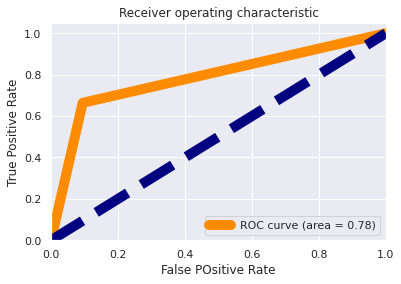

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False POsitive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc='lower right')
plt.show()

# Model Selection

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(accuracy_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(accuracy_score(y_test,model_pred_test)*100,2))
    rfscore=cross_val_score(algorithm_instance,x,y,cv=14)
    rfc=rfscore.mean()
    print('Cross Val Score:',round(rfc*100,2))
    print("\nClassification report for test data\n",classification_report(y_test,model_pred_test))
    print("Classification report for training data\n",classification_report(y_train,model_pred_train))
    print("Confusion Matrix\n",confusion_matrix(y_test,model_pred_test))
    print("\n")
   

    fpr, tpr, thresholds = roc_curve(model_pred_test,y_test)
    roc_auc= auc(fpr,tpr)
    plt.figure()
    plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel("False POsitive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc='lower right')
    plt.show()

#KNeighborsClassifier

Accuracy of training model : 81.63
Accuracy of test data : 73.37
Cross Val Score: 74.07

Classification report for test data
               precision    recall  f1-score   support

           0       0.83      0.61      0.70        87
           1       0.68      0.87      0.76        82

    accuracy                           0.73       169
   macro avg       0.75      0.74      0.73       169
weighted avg       0.75      0.73      0.73       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.86      0.75      0.80       335
           1       0.78      0.88      0.83       340

    accuracy                           0.82       675
   macro avg       0.82      0.82      0.82       675
weighted avg       0.82      0.82      0.82       675

Confusion Matrix
 [[53 34]
 [11 71]]




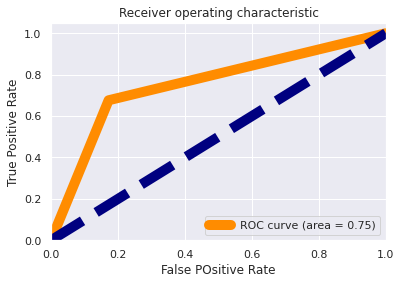

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k=KNeighborsClassifier()
model_selection(k,x_train,y_train,x_test,y_test)

# SVC

Accuracy of training model : 79.7
Accuracy of test data : 74.56
Cross Val Score: 75.4

Classification report for test data
               precision    recall  f1-score   support

           0       0.89      0.57      0.70        87
           1       0.67      0.93      0.78        82

    accuracy                           0.75       169
   macro avg       0.78      0.75      0.74       169
weighted avg       0.79      0.75      0.74       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.91      0.65      0.76       335
           1       0.73      0.94      0.82       340

    accuracy                           0.80       675
   macro avg       0.82      0.80      0.79       675
weighted avg       0.82      0.80      0.79       675

Confusion Matrix
 [[50 37]
 [ 6 76]]




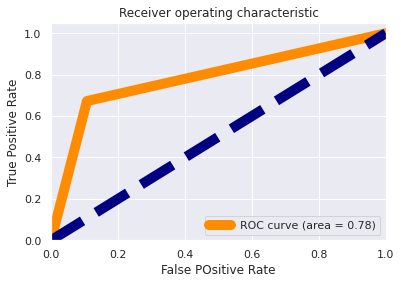

In [ ]:
from sklearn import svm
s=svm.SVC(probability=True)
model_selection(s,x_train,y_train,x_test,y_test)

# DecisionTressClassifier Model

Accuracy of training model : 100.0
Accuracy of test data : 81.07
Cross Val Score: 69.71

Classification report for test data
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        87
           1       0.78      0.85      0.81        82

    accuracy                           0.81       169
   macro avg       0.81      0.81      0.81       169
weighted avg       0.81      0.81      0.81       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       340

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[67 20]
 [12 70]]




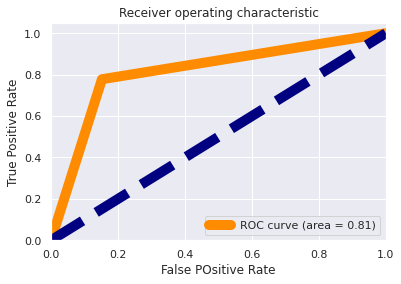

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_selection(dtc,x_train,y_train,x_test,y_test)

#Ensemble Methods

# RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameter={'criterion':['gini', 'entropy', 'log_loss'],
          'max_features' : [None,"sqrt","log2"],
           'class_weight':['balanced',' balanced_subsample'],
           'oob_score':['True','False'],
           'n_estimators':range(0,100,25)}

rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': None, 'n_estimators': 75, 'oob_score': 'False'}


Accuracy of training model : 100.0
Accuracy of test data : 82.25
Cross Val Score: 72.31

Classification report for test data
               precision    recall  f1-score   support

           0       0.93      0.71      0.81        87
           1       0.75      0.94      0.84        82

    accuracy                           0.82       169
   macro avg       0.84      0.83      0.82       169
weighted avg       0.84      0.82      0.82       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       340

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[62 25]
 [ 5 77]]




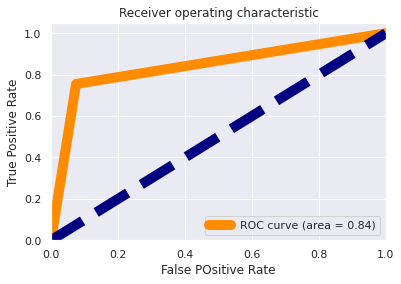

In [ ]:
rf=RandomForestClassifier(n_estimators=75, class_weight= 'balanced',criterion='gini', max_features=None, oob_score= 'False')
model_selection(rf,x_train,y_train,x_test,y_test)

# AdaBoostClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

parameter={'algorithm':['SAMME', 'SAMME.R'],
          'learning_rate' : [0.0,1.0,2.0],
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf2=AdaBoostClassifier()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': 0}


Accuracy of training model : 83.56
Accuracy of test data : 78.11
Cross Val Score: 67.96

Classification report for test data
               precision    recall  f1-score   support

           0       0.92      0.63      0.75        87
           1       0.71      0.94      0.81        82

    accuracy                           0.78       169
   macro avg       0.81      0.79      0.78       169
weighted avg       0.81      0.78      0.78       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.91      0.74      0.82       335
           1       0.78      0.93      0.85       340

    accuracy                           0.84       675
   macro avg       0.85      0.83      0.83       675
weighted avg       0.85      0.84      0.83       675

Confusion Matrix
 [[55 32]
 [ 5 77]]




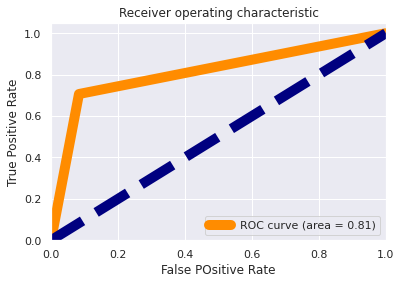

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
rf2=AdaBoostClassifier(algorithm='SAMME', learning_rate= 1.0, n_estimators= 50,random_state= 0)
model_selection(rf2,x_train,y_train,x_test,y_test)


# GradientBoostingClassifier



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

parameter={'loss':['log_loss', 'deviance', 'exponential'],
          'learning_rate' : [0.0,1.0,2.0],
           'criterion':['friedman_mse', 'squared_error', 'mse'],
           'max_features':['auto', 'sqrt', 'log2'],
           'n_estimators':range(0,100,25)}

rf3=GradientBoostingClassifier()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'exponential', 'max_features': 'sqrt', 'n_estimators': 50}


Accuracy of training model : 98.67
Accuracy of test data : 85.21
Cross Val Score: 64.37

Classification report for test data
               precision    recall  f1-score   support

           0       0.92      0.78      0.84        87
           1       0.80      0.93      0.86        82

    accuracy                           0.85       169
   macro avg       0.86      0.85      0.85       169
weighted avg       0.86      0.85      0.85       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       335
           1       0.99      0.99      0.99       340

    accuracy                           0.99       675
   macro avg       0.99      0.99      0.99       675
weighted avg       0.99      0.99      0.99       675

Confusion Matrix
 [[68 19]
 [ 6 76]]




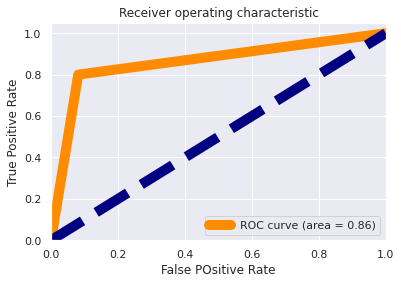

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rf3=GradientBoostingClassifier(criterion='friedman_mse',learning_rate=1.0, loss='exponential', max_features= 'sqrt', n_estimators= 50)
model_selection(rf3,x_train,y_train,x_test,y_test)

# BaggingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

parameter={
           'oob_score': [True,False],
           'n_jobs':range(0,100,25),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingClassifier()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 25, 'oob_score': True, 'random_state': 50}


Accuracy of training model : 100.0
Accuracy of test data : 83.43
Cross Val Score: 73.26

Classification report for test data
               precision    recall  f1-score   support

           0       0.94      0.72      0.82        87
           1       0.76      0.95      0.85        82

    accuracy                           0.83       169
   macro avg       0.85      0.84      0.83       169
weighted avg       0.86      0.83      0.83       169

Classification report for training data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       335
           1       1.00      1.00      1.00       340

    accuracy                           1.00       675
   macro avg       1.00      1.00      1.00       675
weighted avg       1.00      1.00      1.00       675

Confusion Matrix
 [[63 24]
 [ 4 78]]




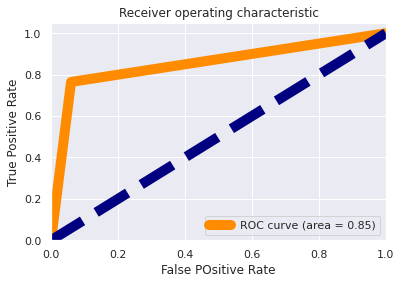

In [ ]:
rf4=BaggingClassifier(n_jobs=25, oob_score= True, random_state=50, n_estimators= 75)
model_selection(rf4,x_train,y_train,x_test,y_test)


# StackingClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
parameter={
            'stack_method':['auto', 'predict_proba', 'decision_function', 'predict'],
           'n_jobs':range(0,100,50)
         }

rf5=StackingClassifier(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 50, 'stack_method': 'auto'}


Accuracy of training model : 80.74
Accuracy of test data : 73.96
Cross Val Score: 75.88

Classification report for test data
               precision    recall  f1-score   support

           0       0.88      0.57      0.69        87
           1       0.67      0.91      0.77        82

    accuracy                           0.74       169
   macro avg       0.77      0.74      0.73       169
weighted avg       0.78      0.74      0.73       169

Classification report for training data
               precision    recall  f1-score   support

           0       0.88      0.71      0.79       335
           1       0.76      0.90      0.83       340

    accuracy                           0.81       675
   macro avg       0.82      0.81      0.81       675
weighted avg       0.82      0.81      0.81       675

Confusion Matrix
 [[50 37]
 [ 7 75]]




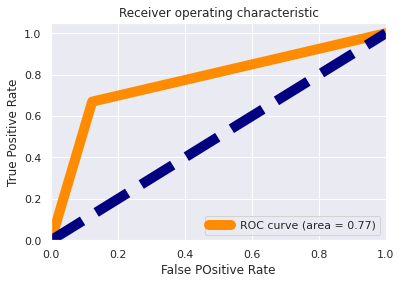

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
estimators = [ ('knc', KNeighborsClassifier()), ('svr',SVC()) ]
rf5=StackingClassifier(estimators,n_jobs=50, stack_method= 'auto')
model_selection(rf5,x_train,y_train,x_test,y_test)

# Model Saving

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf3,open(filename,'wb'))

We selected Gradient Boosting Classifier model since
- it has best cross validation score among all the model and high accuracy.
- highest auc score of 0.86

# Loading Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.20710059171599


# Testing Loaded Model

In [ ]:
def test_inp():
  inp = []
  i=0
  print("Enter single input\n")
  while i<11:
    inn=float(input(f"Enter input {i+1}: "))
    inp.append(inn)
    i=i+1
  input_data_as_numpy_array = np.asarray(inp)
  input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
  prediction = loaded_model.predict(input_data_reshaped)
  if prediction[0]==0:
      print("\nLoan Status: No")
  if prediction[0]==1:
      print("\nLoan Status: Yes")

In [ ]:
print("Input\n",x.head(),"\n\nOutput\n",y.head())

Input
          0    1    2         3    4    5         6         7         8    9   \
0  0.000000  1.0  0.0  0.000000  0.0  0.0  0.628384  0.000000  0.565236  1.0   
1  0.001631  1.0  1.0  0.333333  0.0  0.0  0.543237  0.618705  0.496894  1.0   
2  0.003263  1.0  1.0  0.000000  0.0  1.0  0.390227  0.000000  0.169345  1.0   
3  0.004894  1.0  1.0  0.000000  1.0  0.0  0.334600  0.665810  0.464299  1.0   
4  0.006525  1.0  0.0  0.000000  0.0  0.0  0.637161  0.000000  0.546019  1.0   

    10  
0  1.0  
1  0.0  
2  1.0  
3  1.0  
4  1.0   

Output
 0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64


In above table we have seen that 
- Input 0th row gives output 1 i.e Yes loan approved 
-Input 1st row gives output 0 i.e No loan rejected
-Input 2nd row gives output 1 i.e Yes loan approved
-Input 3rd row gives output 1 i.e Yes loan approved
-Input 4th row gives output 1 i.e Yes loan approved 

So we can use this input data with loaded model to test if model gives correct output

In [ ]:
test_inp()

Enter single input

Enter input 1: 0.001631   
Enter input 2: 1.0  
Enter input 3: 1.0  
Enter input 4: 0.333333  
Enter input 5: 0.0  
Enter input 6: 0.0
Enter input 7: 0.543237  
Enter input 8: 0.618705 
Enter input 9:  0.496894 
Enter input 10: 1.0
Enter input 11: 0.0

Loan Status: No


In [ ]:
test_inp()

Enter single input

Enter input 1: 0.000000    
Enter input 2: 1.0
Enter input 3: 0.0
Enter input 4: 0.0
Enter input 5: 0.0
Enter input 6: 0.0
Enter input 7: 0.628384  
Enter input 8: 0.0
Enter input 9: 0.565236  
Enter input 10: 1.0
Enter input 11: 1.0

Loan Status: Yes


# Conclusion

- 